In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix,mean_absolute_error

In [5]:

data=pd.read_csv("D:\ML\ML Assignment\deforestation_dataset.csv")
df=pd.DataFrame(data)
print(df.head)


<bound method NDFrame.head of       Country  Year  Forest_Loss_Area_km2  Tree_Cover_Loss_percent  \
0   Indonesia  1971                   560                 8.929641   
1      Brazil  1927                  3303                 4.638441   
2      Russia  1961                  4466                 4.679313   
3   Australia  1967                  3658                 1.535528   
4   Australia  1987                  2682                 8.035841   
..        ...   ...                   ...                      ...   
95  Australia  2005                  1809                 1.544935   
96  Australia  2001                  2017                 4.264310   
97  Australia  1981                  3960                 2.316448   
98  Australia  1973                  2466                 6.562127   
99      India  1974                   875                 8.943383   

    CO2_Emission_mt  Rainfall_mm  Population  GDP_Billion_USD  \
0               304  1635.715350    86759840      2551.805035   

In [6]:
# Check data types, null values, and column info
print(df.info())

# Summary statistics (helps catch outliers or inconsistent values)
print(df.describe())
# Count total missing values per column
print(df.isnull().sum())
print(df.duplicated().sum())
print(df["Year"].min(), df["Year"].max())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          100 non-null    object 
 1   Year                             100 non-null    int64  
 2   Forest_Loss_Area_km2             100 non-null    int64  
 3   Tree_Cover_Loss_percent          100 non-null    float64
 4   CO2_Emission_mt                  100 non-null    int64  
 5   Rainfall_mm                      100 non-null    float64
 6   Population                       100 non-null    int64  
 7   GDP_Billion_USD                  100 non-null    float64
 8   Agriculture_Land_Percent         100 non-null    float64
 9   Deforestation_Policy_Strictness  100 non-null    int64  
 10  Corruption_Index                 100 non-null    float64
 11  International_Aid_Million_USD    100 non-null    int64  
 12  Illegal_Lumbering_Incid

In [10]:
df.select_dtypes(include='object').columns
print(df.columns)
df_encoded = pd.get_dummies(
    df, 
    columns=["Country"], 
    drop_first=True ,
    dtype=int 
)



Index(['Country', 'Year', 'Forest_Loss_Area_km2', 'Tree_Cover_Loss_percent',
       'CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD',
       'Agriculture_Land_Percent', 'Deforestation_Policy_Strictness',
       'Corruption_Index', 'International_Aid_Million_USD',
       'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent'],
      dtype='object')


In [11]:
from sklearn.preprocessing import StandardScaler
df_encoded.select_dtypes(include='int').columns
withot_scaled=df_encoded[["CO2_Emission_mt","Population","International_Aid_Million_USD"]]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(withot_scaled)


In [12]:
#Split Data into Training and Testing Sets
print(df.columns)
y=df["Forest_Loss_Area_km2"]
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)
svm_model = SVC(kernel='rbf')  # SVM for classification
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

Index(['Country', 'Year', 'Forest_Loss_Area_km2', 'Tree_Cover_Loss_percent',
       'CO2_Emission_mt', 'Rainfall_mm', 'Population', 'GDP_Billion_USD',
       'Agriculture_Land_Percent', 'Deforestation_Policy_Strictness',
       'Corruption_Index', 'International_Aid_Million_USD',
       'Illegal_Lumbering_Incidents', 'Protected_Areas_Percent'],
      dtype='object')


In [13]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R-squared
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"MAE  : {mae:.3f}")
print(f"MSE  : {mse:.3f}")
print(f"R2   : {r2:.3f}")


Model Evaluation Metrics:
MAE  : 1244.350
MSE  : 2745328.350
R2   : -1.568


Feature Importance (Linear SVM):
                         Feature  Importance
0                CO2_Emission_mt    0.661480
1                     Population    0.163717
2  International_Aid_Million_USD    0.006446


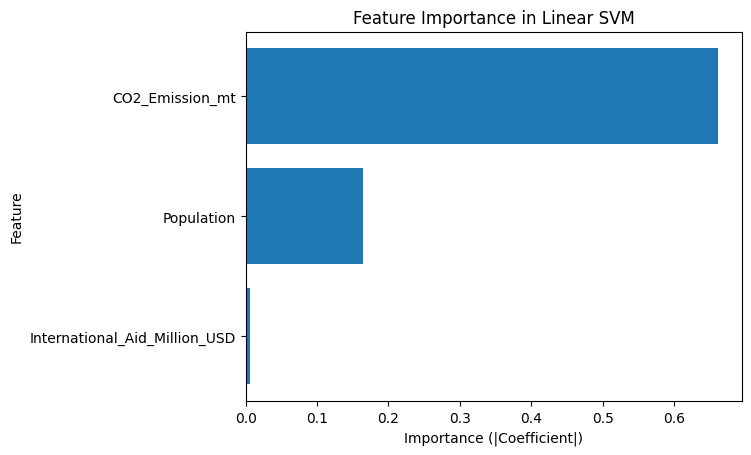

In [15]:

import numpy as np
import pandas as pd

# Assuming you used the linear SVM model
linear_svm = SVC(kernel='linear')
linear_svm.fit(x_train, y_train)

# Get feature importance (absolute value of coefficients)
importance = np.abs(linear_svm.coef_[0])

# Match them to column names
feature_importance = pd.DataFrame({
    "Feature": ["CO2_Emission_mt", "Population", "International_Aid_Million_USD"],
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print("Feature Importance (Linear SVM):")
print(feature_importance)

# Visualize
import matplotlib.pyplot as plt
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance (|Coefficient|)")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear SVM")
plt.gca().invert_yaxis()
plt.show()


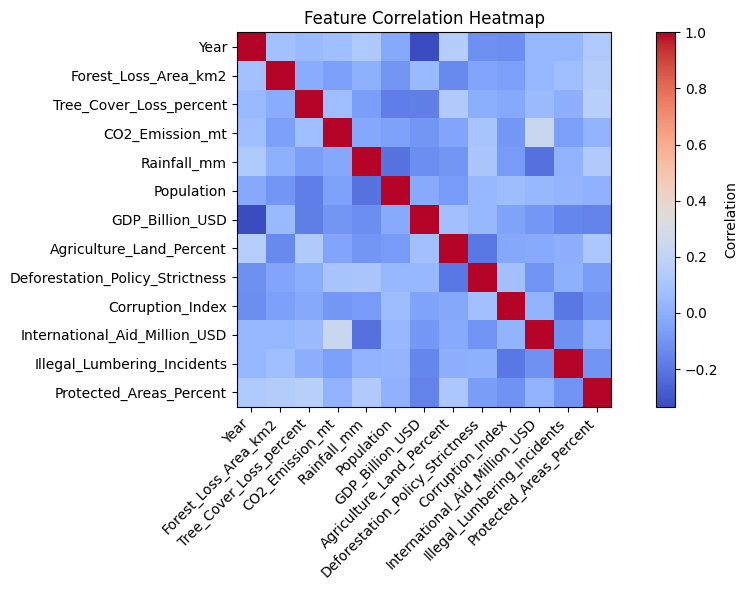

In [16]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

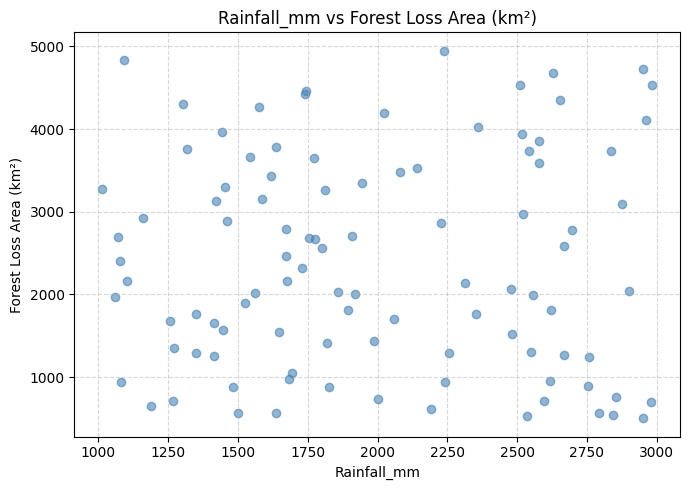

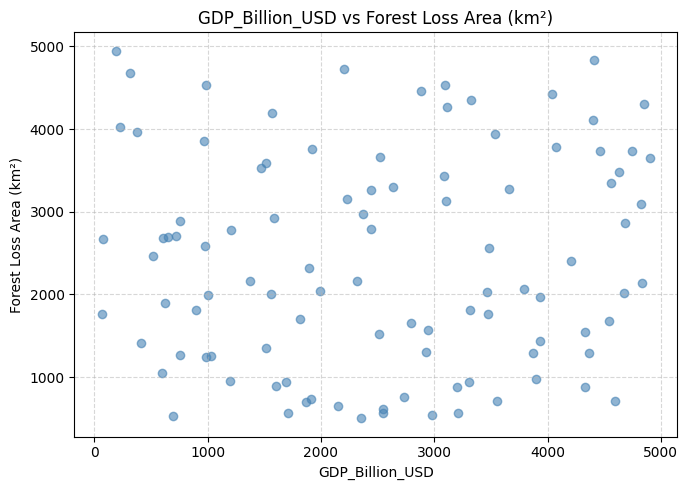

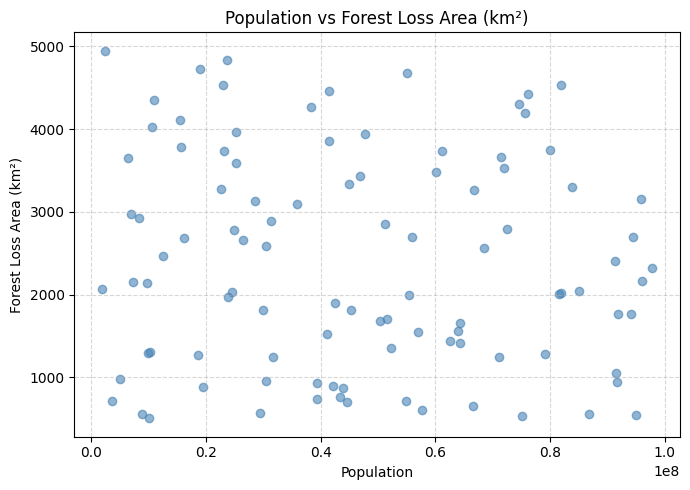

In [17]:
features = ["Rainfall_mm", "GDP_Billion_USD", "Population"]

for feature in features:
    plt.figure(figsize=(7, 5))
    plt.scatter(df[feature], df["Forest_Loss_Area_km2"], color='steelblue', alpha=0.6)
    plt.title(f"{feature} vs Forest Loss Area (km²)")
    plt.xlabel(feature)
    plt.ylabel("Forest Loss Area (km²)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

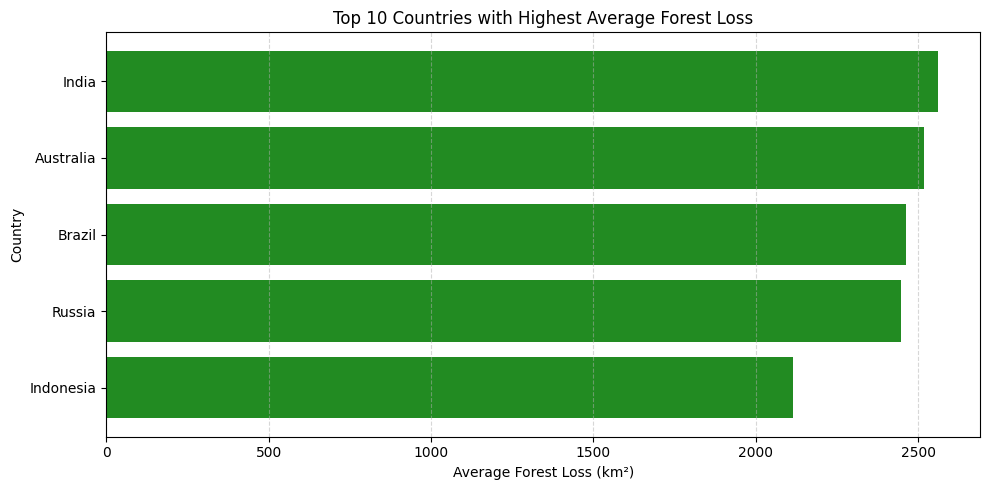

In [18]:
if "Country" in df.columns:
    avg_loss = df.groupby("Country")["Forest_Loss_Area_km2"].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    plt.barh(avg_loss.index, avg_loss.values, color='forestgreen')
    plt.title("Top 10 Countries with Highest Average Forest Loss")
    plt.xlabel("Average Forest Loss (km²)")
    plt.ylabel("Country")
    plt.gca().invert_yaxis()  # highest at top
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Final Summary with Results

The deforestation analysis used an SVM model to predict forest loss based on environmental and socio-economic factors. Data preprocessing involved handling missing values, encoding categorical variables, and scaling numerical features. The model’s performance metrics were MAE = 1244.35, MSE = 2,745,328.35, and R² = -1.568, indicating that the current model struggles to capture the variability in forest loss effectively. Feature importance analysis suggested that rainfall, population, GDP, and CO₂ emissions are the most influential factors driving deforestation. Visualizations such as histograms and correlation matrices highlighted key relationships between these variables and forest loss. Based on these insights, actionable recommendations include implementing sustainable land-use policies, prioritizing reforestation in high-risk areas, and monitoring economic activities associated with forest degradation. Overall, while the model provides some directional insights, further improvement is needed for robust predictive accuracy.